# PCA and Horn's Parallel Analysis Lab

In this lab you'll practice using PCA on two datasets: heptathalon performance 
Horn's Parallel Analysis is a way to determine how many components you should keep after using a PCA on your data. Essentially it will tell you which of your components are likely noise which can be discarded.

---

### Load packages and heptathalon data

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [24]:
hep = pd.read_csv('heptathlon.csv')

In [25]:
hep.columns[1:]

Index([u'hurdles', u'highjump', u'shot', u'run200m', u'longjump', u'javelin',
       u'run800m', u'score'],
      dtype='object')

In [26]:
hep.columns = ['athlete'] + hep.columns[1:].tolist()

In [27]:
hep.head(3)

,athlete,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
1,John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
2,Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858


In [28]:
hep.iloc[:,1:].corr()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
hurdles,1.000000,-0.811403,-0.651335,0.773721,-0.912134,-0.007763,0.779257,-0.923198
highjump,-0.811403,1.000000,0.440786,-0.487664,0.782442,0.002153,-0.591163,0.767359
shot,-0.651335,0.440786,1.000000,-0.682670,0.743073,0.268989,-0.419620,0.799699
run200m,0.773721,-0.487664,-0.682670,1.000000,-0.817205,-0.333043,0.616810,-0.864883
longjump,-0.912134,0.782442,0.743073,-0.817205,1.000000,0.067108,-0.699511,0.950437
javelin,-0.007763,0.002153,0.268989,-0.333043,0.067108,1.000000,0.020049,0.253147
run800m,0.779257,-0.591163,-0.419620,0.616810,-0.699511,0.020049,1.000000,-0.772776
score,-0.923198,0.767359,0.799699,-0.864883,0.950437,0.253147,-0.772776,1.000000


In [29]:
from sklearn.decomposition import PCA

In [30]:
from sklearn.preprocessing import StandardScaler
hep_n = StandardScaler().fit_transform(hep.iloc[:,1:-1])
hep_n[:,[0,3,6]] *= -1


In [31]:
pca = PCA().fit(hep_n)

In [32]:
pca.components_

array([[-0.45287105, -0.37719923, -0.3630725 , -0.40789504, -0.45623185,
        -0.075409  , -0.37495938],
       [-0.15792058, -0.24807386,  0.28940743,  0.26038545, -0.05587394,
         0.84169212, -0.22448984],
       [ 0.04514996,  0.36777902, -0.67618919, -0.08359211, -0.13931653,
         0.47156016,  0.39585671],
       [ 0.02653873,  0.67999172,  0.12431725, -0.3610658 ,  0.11129249,
         0.12079924, -0.6034113 ],
       [ 0.09494792, -0.01879888, -0.51165201,  0.64983404,  0.1842981 ,
        -0.13510669, -0.50432116],
       [ 0.78334101, -0.09939981,  0.05085983, -0.02495639, -0.59020972,
         0.02724076, -0.1555552 ],
       [ 0.38024707, -0.43393114, -0.21762491, -0.45338483,  0.61206388,
         0.17294667, -0.09830963]])

In [33]:
pca1_evec = pca.components_[0]
for weight, event in zip(pca1_evec, hep.iloc[:,1:-1].columns):
    print event, weight

hurdles -0.452871046493
highjump -0.377199230356
shot -0.363072497179
run200m -0.407895041255
longjump -0.456231849776
javelin -0.0754089953116
run800m -0.374959378673


In [34]:
pca2_evec = pca.components_[2]
for weight, event in zip(pca2_evec, hep.iloc[:,1:-1].columns):
    print event, weight

hurdles 0.0451499646706
highjump 0.367779024656
shot -0.676189188799
run200m -0.0835921094786
longjump -0.139316525161
javelin 0.471560156559
run800m 0.395856709505


---

### Create dataframe excluding athlete and score

In [37]:
dt = hep.drop(['athlete','score'],axis=1)
dt

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
0,12.69,1.86,15.80,22.56,7.27,45.66,128.51
1,12.85,1.80,16.23,23.65,6.71,42.56,126.12
2,13.20,1.83,14.20,23.10,6.68,44.54,124.20
3,13.61,1.80,15.23,23.92,6.25,42.78,132.24
4,13.51,1.74,14.76,23.93,6.32,47.46,127.90
5,13.75,1.83,13.50,24.65,6.33,42.82,125.79
6,13.38,1.80,12.88,23.59,6.37,40.28,132.54
7,13.55,1.80,14.13,24.48,6.47,38.00,133.65
8,13.63,1.83,14.28,24.86,6.11,42.20,136.05
9,13.25,1.77,12.62,23.59,6.28,39.06,134.74


---

### Examine the correlation between the different events

Plot a heatmap if you want to get fancy. What does the correlation matrix tell you?

In [38]:
dt.corr()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
hurdles,1.000000,-0.811403,-0.651335,0.773721,-0.912134,-0.007763,0.779257
highjump,-0.811403,1.000000,0.440786,-0.487664,0.782442,0.002153,-0.591163
shot,-0.651335,0.440786,1.000000,-0.682670,0.743073,0.268989,-0.419620
run200m,0.773721,-0.487664,-0.682670,1.000000,-0.817205,-0.333043,0.616810
longjump,-0.912134,0.782442,0.743073,-0.817205,1.000000,0.067108,-0.699511
javelin,-0.007763,0.002153,0.268989,-0.333043,0.067108,1.000000,0.020049
run800m,0.779257,-0.591163,-0.419620,0.616810,-0.699511,0.020049,1.000000


---

### Standardize the data

In [39]:
from sklearn.preprocessing import StandardScaler




---

### Fit a PCA on the standardized data using sklearn

In [40]:
hep_pca = PCA()
hep_pca.fit(dt)
stats_pcs = hep_pca.transform(dt)

---

### Create a DataFrame with the principal components

Add back in the athelete and score columns from the original data.

In [41]:
stats_pcs = pd.DataFrame(stats_pcs, columns=['PC'+str(i) for i in range(1,8)])
stats_pcs['PCA1'] = hep.iloc[:,0]
stats_pcs['PCA2'] = hep.score

In [42]:
hep_pca.components_

array([[  6.95086924e-02,  -5.56978060e-03,  -7.79060896e-02,
          7.29675448e-02,  -4.03692989e-02,   6.68558370e-03,
          9.90994208e-01],
       [ -9.48914170e-03,   5.64714749e-04,   1.35928233e-01,
         -1.01200427e-01,   1.48845034e-02,   9.85295451e-01,
          1.27652701e-02],
       [  2.21808290e-01,  -1.45140493e-02,  -8.83740455e-01,
          3.10057000e-01,  -1.84943194e-01,   1.60212685e-01,
         -1.16558146e-01],
       [ -3.27376739e-01,   2.12385605e-02,  -4.25006542e-01,
         -8.15852202e-01,   2.04198278e-01,  -3.21690666e-02,
          5.82772002e-02],
       [  8.07029319e-01,  -1.40138230e-01,   1.04422071e-01,
         -4.61786801e-01,  -3.18993151e-01,  -4.88038779e-02,
         -2.78475644e-02],
       [ -4.24850883e-01,  -9.83735676e-02,   5.17448016e-02,
         -8.24862444e-02,  -8.94592570e-01,  -6.17043752e-03,
          2.98704278e-03],
       [ -8.31231453e-02,  -9.84881131e-01,  -1.56496439e-02,
          5.13129737e-02,   1.42

---

### Plot the variance explained (ratio) of your components

Explain what this chart tells you about your components.

In [45]:
hep_pca.explained_variance_ #............????

array([  6.71685631e+01,   1.23792986e+01,   1.84335142e+00,
         3.29337449e-01,   1.00663041e-01,   2.07791268e-02,
         1.06131446e-03])

ValueError: x and y must have same first dimension

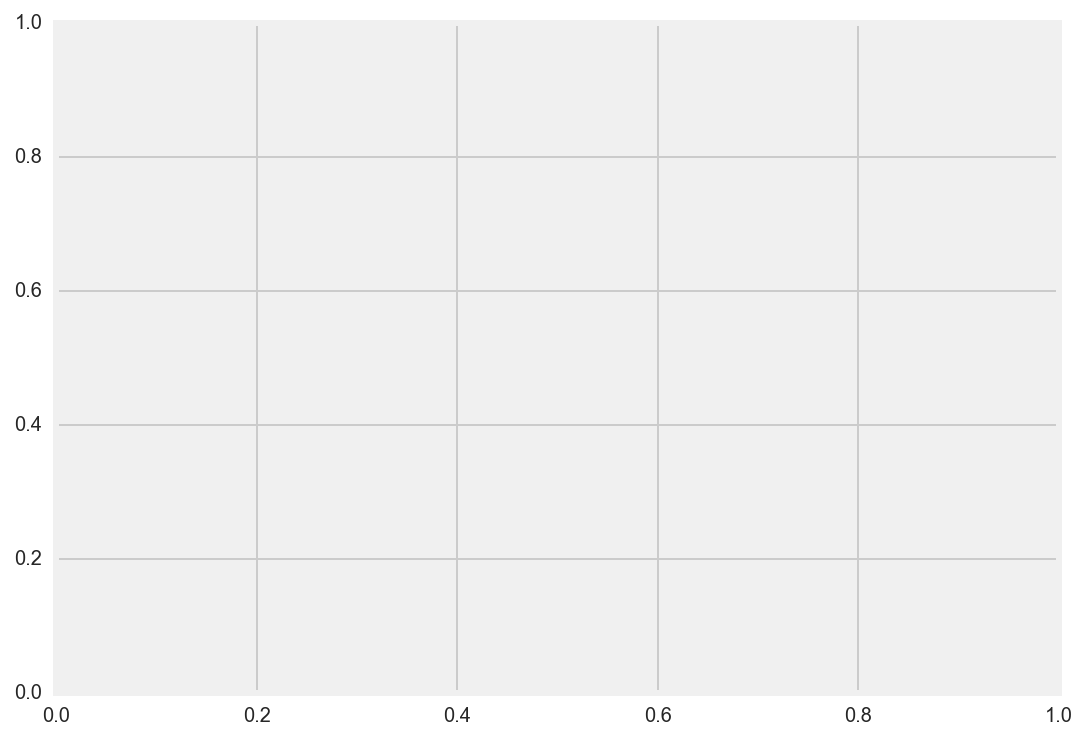

In [49]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, stats_pcs.shape[1]+1), hep_pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, stats_pcs.shape[1]+1), hep_pca.explained_variance_ratio_, s=100)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

---

### Print out the weights/eigenvectors (.components_ ) with their corresponding variables for PC1 and PC2

Based on how the original variables are weighted to calculate the components, how would you describe PC1 and PC2?

In [54]:
for col, comp in zip(stats_pcs.columns, hep_pca.components_[PC1]):
    print col, comp

NameError: name 'PC1' is not defined

In [50]:
for col, comp in zip(stats.columns, hep_pca.components_[PCA2]):
    print col, comp

NameError: name 'stats' is not defined

In [51]:
stats_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PCA1,PCA2
0,-7.935036,4.623502,-1.932601,0.596760,-0.044456,-0.256073,0.041581,Joyner-Kersee (USA),7291
1,-10.244140,1.476831,-2.052805,-0.682836,0.031115,0.127155,0.038903,John (GDR),6897
2,-11.990222,3.179182,0.194416,0.332989,0.317783,-0.075283,-0.012488,Behmer (GDR),6858
3,-4.008781,1.594408,-1.509790,-0.471268,0.380926,0.158688,-0.052657,Sablovskaite (URS),6540
4,-8.250504,6.087248,0.130071,-0.637390,0.125062,0.077468,0.051599,Choubenkova (URS),6540


---

### Plot PC1 vs. PC2. Which athletes are notable on each component?

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(stats_pcs.PC1.values, stats_pcs.PC2.values, s=0)

for i, txt in enumerate(stats_pcs.athlete.values):
    ax.annotate(txt, (0, 0), (stats_pcs.PC1.values[i], stats_pcs.PC2.values[i]),
            arrowprops=dict(arrowstyle='<-', color='black', linewidth=1.5),
            xycoords='data', textcoords='data', fontsize=12, color="black")

ax.set_title('PC1 (run) vs. PC2 (javelin/shot)')
ax.set_xlabel('principal component 1 (run)')
ax.set_ylabel('principal component 2 (javelin/shot)')
plt.show()

---

### Plot PC1 vs. score and PC2 vs. score. What does this tell you about the relationship between the events and the score?

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(stats_pcs.???.????, stats_pcs.???.??, s=100)

ax.set_title('PC1 (run) vs. score')
ax.set_xlabel('principal component 1 (run)')
ax.set_ylabel('score')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(??, ???, s=100, c='darkred')

ax.set_title('PC2 (shot/javelin) vs. score')
ax.set_xlabel('principal component 2 (shot/javelin)')
ax.set_ylabel('score')
plt.show()

---

### Horn's parallel analysis

You can determine the appropriate number of components to keep by using a bootstrapping procedure known as Horn's Parallel Analysis. This is (as far as I know) the gold standard in determining which components aren't noise.

How to do the parallel analysis (pseudocode):

    for n iterations:
        create normally distributed random data the same shape as your data
        fit a PCA on the random data
        pull out the eigenvalues
    select a percentile of the eigenvalues as your threshold (0.5 = median, 0.95 = 95% confidence, etc.)
    plot the random component eigenvalues at that percentile against your data's pca eigenvalues
    components above the selected percentile are not noise, those under are
    
    
Write a function to perform the parallel analysis.

In [ ]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

---

### Run parallel analysis for the data

In [ ]:
hep_pa = horn_parallel_analysis(hep.iloc[:,1:-1].shape, percentile=95)

---

### Plot the wine eigenvalues (`.variance_explained_`) against the parallel analysis random eigenvalue cutoffs

How many components are not noise, based on the chart?

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, hep.iloc[:,1:-1].shape[1]+1), hep_pca.explained_variance_, lw=2)
ax.scatter(range(1, hep.iloc[:,1:-1].shape[1]+1), hep_pca.explained_variance_, s=50)

ax.plot(range(1, len(hep_pa)+1), hep_pa, lw=2, color='darkred')
ax.scatter(range(1, len(hep_pa)+1), hep_pa, s=40, color='darkred')


ax.set_title('Horns parallel analysis on hep data components')
ax.set_xlabel('principal component')
ax.set_ylabel('eigenvalue')
plt.show()